# INTERPLANETARY MISSIONS 


## DATABASE

This database was collected and shared by a Science study manager at ESA/ESTEC 
The prupose of this part is to find a model that can help predicting the cost of an interplanetary mission based on parameters such as mass, instruments,

First, let's take a look at what we hav
e in terms on data for the missions collected.


### GOAL:
To build a model that can predit the cost of an interplanetary mission based on certain parameters such as wet/dry mass, mission target, type of spacecraft

- CODE TO 'CLEAN' the NOTEBOOK FOR PRESENTATION

In [1]:
from IPython.display import HTML
HTML('''<script> 
code_show=true;  
function code_toggle() { 
if (code_show){ 
$('div.input').hide(); 
} else { 
$('div.input').show(); 
} 
code_show = !code_show 
}  
$( document ).ready(code_toggle); 
</script> 
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''') 

- IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math 


- IMPORTING THE DATASET

In [3]:
ip_missions = pd.read_csv('/Users/ajiacovic/Documents/GitHub/Satellites_Market_study/data/sc_database_planetary.csv', sep=';')

In [4]:
ip_missions.info()
#This dataset is small but seems to have a few issues: data types(sees commas so things are strings =to_numeric?), missing values, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   mission                         49 non-null     object 
 1   Agency                          46 non-null     object 
 2   launch dte                      46 non-null     object 
 3   type                            46 non-null     object 
 4   Duration [years]                46 non-null     object 
 5   target                          46 non-null     object 
 6   category                        46 non-null     object 
 7   Instr #                         46 non-null     float64
 8   Delta V
km/s                    40 non-null     object 
 9   e.c.                            46 non-null     float64
 10  Dollar
/EUR                     46 non-null     object 
 11  Indus Cost 
[MEUR]              37 non-null     object 
 12  Launch 
[MEUR]                  37 n

- SOLVING DATA TYPE ISSUES

In [5]:
ip_missions.head()

,mission,Agency,launch dte,type,Duration [years],target,category,Instr #,Delta V\nkm/s,e.c.,...,PAYLOAD.1,MECH.1,POW.1,STR.1,SYS.1,TCS.1,HARNESS.1,SA kg/m2,volume,Density
0,AIM,ESA,2025,planetary,2,NEO,RDV,3.0,"1,286",2020.0,...,5%,0%,10%,26%,0%,4%,8%,17%,NaN,NaN
1,AKATSUKI,JAXA,2010,planetary,"4,5",Venus,Orbiter,5.0,x,2010.0,...,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,"2,1112","236,8321334"
2,BEPI COLOMBO,ESA/JAXA,2019,planetary,8,Mercury,Remote Sensing,11.0,x,2020.0,...,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN
3,CASSINI-HUYENS,NASA,1997,planetary,4,Saturn,x,11.0,"2,04",2000.0,...,NaN,NaN,1%,x,14%,NaN,NaN,NaN,"108,8","51,76470588"
4,DAWN,NASA,x,planetary,9,Main Belt,RDV,3.0,11,2007.0,...,6%,2%,28%,15%,0%,6%,11%,0%,"3,686556","330,2811621"


In [6]:
wrong_type_columns = ['Delta V\nkm/s', 'Dollar\n/EUR',
       'Indus Cost \n[MEUR]', 'Launch \n[MEUR]', 'OPS \n[EUR]', 'SCI \n[MEUR]',
       'ESTEC \n[MEUR]', 'ESA Cost Risk [MEUR]', 'CaC at current e.c.',
       'CaC at e.c.\n [MEUR]', 'B to FAR ', 'Maturity of the \nprovided info',
       'Comments ', 'L', 'W', 'H', 'Max drate\n [kbps]', 'dMax to Earth',
       'Antenna [cm]', 'Radiators', 'SA [kg]', 'SA [m2]',
       'dMax to Sun', 'WET', 'DRY Mass', 'AOCS', 'COMMS', 'CPROP', 'EPROP',
       'DHS', 'PAYLOAD', 'MECH', 'POW', 'STR', 'SYS', 'TCS', 'HARNESS',
       'MARGIN', 'EPROP.1', 'CPROP.1', 'RESID', 'AOCS.1', 'COMMS.1', 'CPROP.2',
       'EPROP.2', 'DHS.1', 'PAYLOAD.1', 'MECH.1', 'POW.1', 'STR.1', 'SYS.1',
       'TCS.1', 'HARNESS.1', 'SA kg/m2', 'volume', 'Density','Duration [years]']


In [7]:
ip_missions[wrong_type_columns] = ip_missions[wrong_type_columns].apply(lambda x: x.str.replace('%', ''), axis=1)
ip_missions[wrong_type_columns]

,Delta V\nkm/s,Dollar\n/EUR,Indus Cost \n[MEUR],Launch \n[MEUR],OPS \n[EUR],SCI \n[MEUR],ESTEC \n[MEUR],ESA Cost Risk [MEUR],CaC at current e.c.,CaC at e.c.\n [MEUR],...,MECH.1,POW.1,STR.1,SYS.1,TCS.1,HARNESS.1,SA kg/m2,volume,Density,Duration [years]
0,"1,286",EUR,129,75,"25,1",0,"25,9",0,255,255,...,0,10,26,0,4,8,17,NaN,NaN,2
1,x,USD,NaN,NaN,NaN,NaN,NaN,NaN,"323,1239852",350,...,NaN,NaN,x,NaN,NaN,NaN,NaN,"2,1112","236,8321334","4,5"
2,x,EUR,x,x,x,x,x,x,1650,1650,...,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,8
3,"2,04",USD,2060,422,758,x,x,x,"3679,860612",3240,...,NaN,1,x,14,NaN,NaN,NaN,"108,8","51,76470588",4
4,11,USD,105,0,20,x,x,x,"435,2789892",446,...,2,28,15,0,6,11,0,"3,686556","330,2811621",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ip_missions[wrong_type_columns] = ip_missions[wrong_type_columns].apply(lambda x: x.str.replace(',', '.'), axis=1)
ip_missions[wrong_type_columns]

,Delta V\nkm/s,Dollar\n/EUR,Indus Cost \n[MEUR],Launch \n[MEUR],OPS \n[EUR],SCI \n[MEUR],ESTEC \n[MEUR],ESA Cost Risk [MEUR],CaC at current e.c.,CaC at e.c.\n [MEUR],...,MECH.1,POW.1,STR.1,SYS.1,TCS.1,HARNESS.1,SA kg/m2,volume,Density,Duration [years]
0,1.286,EUR,129,75,25.1,0,25.9,0,255,255,...,0,10,26,0,4,8,17,NaN,NaN,2
1,x,USD,NaN,NaN,NaN,NaN,NaN,NaN,323.1239852,350,...,NaN,NaN,x,NaN,NaN,NaN,NaN,2.1112,236.8321334,4.5
2,x,EUR,x,x,x,x,x,x,1650,1650,...,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,8
3,2.04,USD,2060,422,758,x,x,x,3679.860612,3240,...,NaN,1,x,14,NaN,NaN,NaN,108.8,51.76470588,4
4,11,USD,105,0,20,x,x,x,435.2789892,446,...,2,28,15,0,6,11,0,3.686556,330.2811621,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ip_missions[wrong_type_columns] = ip_missions[wrong_type_columns].apply(pd.to_numeric, errors ='coerce')
ip_missions[wrong_type_columns]

,Delta V\nkm/s,Dollar\n/EUR,Indus Cost \n[MEUR],Launch \n[MEUR],OPS \n[EUR],SCI \n[MEUR],ESTEC \n[MEUR],ESA Cost Risk [MEUR],CaC at current e.c.,CaC at e.c.\n [MEUR],...,MECH.1,POW.1,STR.1,SYS.1,TCS.1,HARNESS.1,SA kg/m2,volume,Density,Duration [years]
0,1.286,NaN,129.0,75.0,25.1,0.0,25.9,0.0,255.000000,255.0,...,0.0,10.0,26.0,0.0,4.0,8.0,17.0,NaN,NaN,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.123985,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.111200,236.832133,4.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.000000,1650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
3,2.040,NaN,2060.0,422.0,758.0,NaN,NaN,NaN,3679.860612,3240.0,...,NaN,1.0,NaN,14.0,NaN,NaN,NaN,108.800000,51.764706,4.0
4,11.000,NaN,105.0,0.0,20.0,NaN,NaN,NaN,435.278989,446.0,...,2.0,28.0,15.0,0.0,6.0,11.0,0.0,3.686556,330.281162,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ip_missions.dtypes

mission              object
Agency               object
launch dte           object
type                 object
Duration [years]    float64
                     ...   
TCS.1               float64
HARNESS.1           float64
SA kg/m2            float64
volume              float64
Density             float64
Length: 66, dtype: object

- CLEARING OUT EMPTY ROWS

In [11]:
#When checking the dataset, I also noticed some 'empty row's' let's check them out:

ip_missions.tail(79)#Ok, it looks as is the dataset was missing the last 78 rows, or that they were added when saved 
#This data comes from excel.

,mission,Agency,launch dte,type,Duration [years],target,category,Instr #,Delta V\nkm/s,e.c.,...,PAYLOAD.1,MECH.1,POW.1,STR.1,SYS.1,TCS.1,HARNESS.1,SA kg/m2,volume,Density
45,VIKING LANDER,NASA,1975,planetary,4.0,Mars,Lander,3.0,NaN,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ip_missions = ip_missions[:-78]

In [13]:
ip_missions.dtypes

mission              object
Agency               object
launch dte           object
type                 object
Duration [years]    float64
                     ...   
TCS.1               float64
HARNESS.1           float64
SA kg/m2            float64
volume              float64
Density             float64
Length: 66, dtype: object

- CHECKING MISSING VALUES

In [14]:
missing_values = ip_missions.isnull().sum().sort_values(ascending=False)
missing_values

Dollar\n/EUR                       46
Comments                           46
Maturity of the \nprovided info    46
Radiators                          45
ESTEC \n[MEUR]                     42
                                   ..
CaC at e.c.\n [MEUR]                0
Pmax [W] at max distance            0
WET                                 0
DRY Mass                            0
mission                             0
Length: 66, dtype: int64

- DROPPING EMPTY COLUMNS

In [15]:
ip_missions.columns

Index(['mission', 'Agency', 'launch dte', 'type', 'Duration [years]', 'target',
       'category', 'Instr #', 'Delta V\nkm/s', 'e.c.', 'Dollar\n/EUR',
       'Indus Cost \n[MEUR]', 'Launch \n[MEUR]', 'OPS \n[EUR]', 'SCI \n[MEUR]',
       'ESTEC \n[MEUR]', 'ESA Cost Risk [MEUR]', 'CaC at current e.c.',
       'CaC at e.c.\n [MEUR]', 'B to FAR ', 'Maturity of the \nprovided info',
       'Comments ', 'L', 'W', 'H', 'Max drate\n [kbps]', 'dMax to Earth',
       'Antenna [cm]', 'Radiators', 'SA [kg]', 'SA [m2]',
       'Pmax [W] at max distance', 'dMax to Sun', 'WET', 'DRY Mass', 'AOCS',
       'COMMS', 'CPROP', 'EPROP', 'DHS', 'PAYLOAD', 'MECH', 'POW', 'STR',
       'SYS', 'TCS', 'HARNESS', 'MARGIN', 'EPROP.1', 'CPROP.1', 'RESID',
       'AOCS.1', 'COMMS.1', 'CPROP.2', 'EPROP.2', 'DHS.1', 'PAYLOAD.1',
       'MECH.1', 'POW.1', 'STR.1', 'SYS.1', 'TCS.1', 'HARNESS.1', 'SA kg/m2',
       'volume', 'Density'],
      dtype='object')

In [16]:
ip_missions.drop(['Comments ','Dollar\n/EUR','Maturity of the \nprovided info','e.c.','Radiators'], axis=1, inplace=True)

In [17]:
#Unfortunately most of the features have too many missing values that cannot be interpolated 
#In the near uture the goal will be to add the information in order to run a more acurate model
#In the meantime, we will drop it, for the purpose of this exercice.

ip_missions.drop(['AOCS', 'COMMS', 'CPROP', 'EPROP',
       'DHS', 'PAYLOAD', 'MECH', 'POW', 'STR', 'SYS', 'TCS', 'HARNESS',
       'MARGIN', 'EPROP.1', 'CPROP.1', 'RESID', 'AOCS.1', 'COMMS.1', 'CPROP.2',
       'EPROP.2', 'DHS.1', 'PAYLOAD.1', 'MECH.1', 'POW.1', 'STR.1', 'SYS.1',
       'TCS.1', 'HARNESS.1','L', 'W', 'H', 'Max drate\n [kbps]', 'dMax to Earth',
       'Antenna [cm]', 'SA [kg]', 'SA [m2]', 'CaC at e.c.\n [MEUR]',
       'B to FAR ', 'Delta V\nkm/s', 'Indus Cost \n[MEUR]',
       'Launch \n[MEUR]', 'OPS \n[EUR]', 'SCI \n[MEUR]', 'ESTEC \n[MEUR]',
       'ESA Cost Risk [MEUR]'],axis =1, inplace=True)


In [18]:
ip_missions.drop(['SA kg/m2','Density','volume'],axis=1,inplace=True)


In [19]:
missing_values = ip_missions.isnull().sum().sort_values(ascending=False)
missing_values

DRY Mass                    0
WET                         0
dMax to Sun                 0
Pmax [W] at max distance    0
CaC at current e.c.         0
Instr #                     0
category                    0
target                      0
Duration [years]            0
type                        0
launch dte                  0
Agency                      0
mission                     0
dtype: int64

- CHOSING RELEVANT FEATURES / TARGET 

In [20]:
ip_missions.rename(columns={'Duration [years]':'Duration_Years',
                    'launch dte':'Launch_Date','target':'mission_taget',
                    'Instr #':'Instruments','CaC at current e.c.':'Cost',
                    'Pmax [W] at max distance':'Power_Watts','dMax to Sun':'MaxDistance_toSun',
                    'DRY Mass':'Dry_Mass'}, inplace=True)

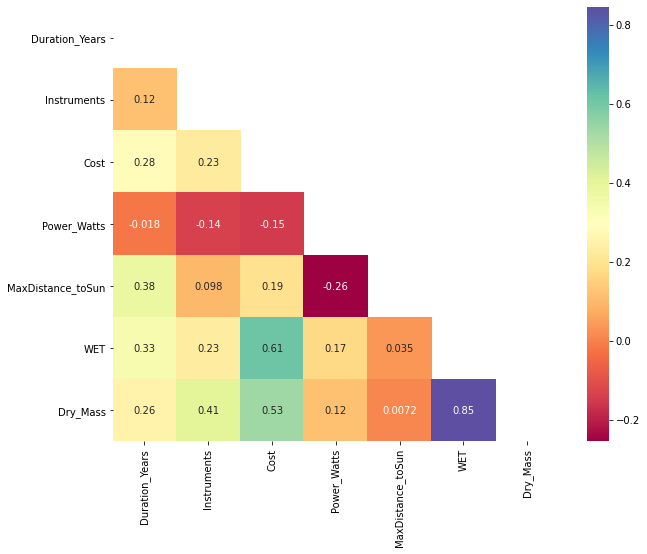

In [21]:
ipm_corr = ip_missions.corr()
mask = np.triu(np.ones_like(ipm_corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(ipm_corr,mask=mask, cmap ='Spectral', annot=True)
plt.show()

In [22]:
#TYPE OF SPACECRAFT

In [23]:
ip_missions.category.unique()
#I see many categories here that could be gathered into bigger categories:
# Orbiter - Lander - Flybyer - Probe -Other

array(['RDV', 'Orbiter', 'Remote Sensing', 'x', 'Flybyer',
       'Sample Return', 'Probe', 'Orbiter ', 'Impactor', 'Lander'],
      dtype=object)

In [24]:
ip_missions['Cat'] = ip_missions['category']
ip_m_converter = {'RDV':'Orbiter', 'Remote Sensing':'Orbiter', 'x':'Other',
       'Sample Return':'Other', 'Orbiter ':'Orbiter', 'Impactor':'Other'}
ip_missions['Cat'] = ip_missions['Cat'].replace(ip_m_converter)

In [25]:
ip_missions.Cat.unique()

array(['Orbiter', 'Other', 'Flybyer', 'Probe', 'Lander'], dtype=object)

In [26]:
m_cat = ['Orbiter', 'Lander', 'Flybyer', 'Probe','Other']

for cat in m_cat:
    ip_missions[cat] = ip_missions.category.str.contains(cat, regex=False).astype(int)

In [27]:
ip_missions.drop(['category','Cat'], axis=1,inplace=True)

In [28]:
ip_missions.drop(['mission', 'Agency', 'Launch_Date', 'type'],axis=1, inplace=True)

In [29]:
ip_missions['mission_taget'].unique()

array(['NEO', 'Venus', 'Mercury', 'Saturn', 'Main Belt', 'x', 'Europa',
       'Jupiter', 'Comet', 'Moon', 'Titan', 'Mars', 'Kuiper belt', 'Sun'],
      dtype=object)

In [30]:
# DESTINATION

#These can also be made into categories (that we think can affect the price similarly as a group)
#Small_bodies, Planet, Giant_Planet,
m_target_convert ={'NEO':'Small_bodies', 'Venus':'Planet', 'Mercury':'Planet', 'Saturn':'Giant_Planet', 
                    'Main Belt':'Small_bodies', 'x':'Small_bodies', 'Europa':'Planet',
                    'Jupiter':'Giant_Planet', 'Comet':'Small_bodies', 'Moon':'Planet', 
                    'Titan':'Planet', 'Mars':'Planet', 'Kuiper belt':'Planet', 'Sun':'Planet'}
ip_missions['mission_taget'].replace(m_target_convert, inplace=True)
ip_missions['mission_taget'].unique()

array(['Small_bodies', 'Planet', 'Giant_Planet'], dtype=object)

In [31]:
m_target = ['Small_bodies', 'Planet', 'Giant_Planet']

for tar in m_target:
    ip_missions[tar] = ip_missions.mission_taget.str.contains(tar, regex=False).astype(int)

In [32]:
ip_missions.drop('mission_taget', axis=1, inplace=True)

In [33]:
ip_missions.isnull().sum()



Duration_Years       0
Instruments          0
Cost                 0
Power_Watts          0
MaxDistance_toSun    0
WET                  0
Dry_Mass             0
Orbiter              0
Lander               0
Flybyer              0
Probe                0
Other                0
Small_bodies         0
Planet               0
Giant_Planet         0
dtype: int64

In [34]:
ip_missions.describe()

,Duration_Years,Instruments,Cost,Power_Watts,MaxDistance_toSun,WET,Dry_Mass,Orbiter,Lander,Flybyer,Probe,Other,Small_bodies,Planet,Giant_Planet
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.000000,46.000000
mean,4.710870,7.521739,773.077441,962.304348,2.871522,1651.529935,925.399500,0.478261,0.086957,0.152174,0.043478,0.0,0.239130,0.760870,0.130435
std,3.293089,3.680212,908.978083,808.849605,4.669504,1379.525689,717.685456,0.505047,0.284885,0.363158,0.206185,0.0,0.431266,0.431266,0.340503
min,0.250000,1.000000,73.626570,32.000000,0.220000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,5.000000,283.529956,407.000000,1.000000,579.000000,392.210000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
50%,4.000000,7.000000,407.328085,750.000000,1.500000,1127.887500,674.686000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
75%,7.000000,10.000000,820.360837,1371.250000,2.652500,2385.500000,1143.825000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
max,12.500000,17.000000,4000.000000,3500.000000,30.000000,5632.000000,3000.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


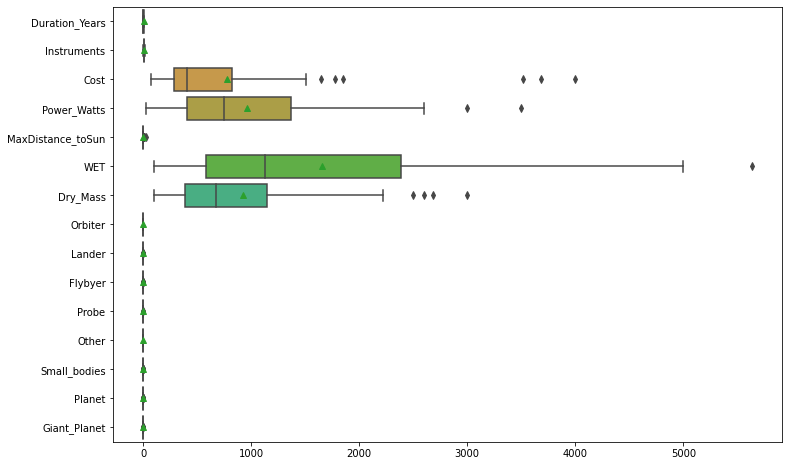

In [35]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=ip_missions,whis=1.5,orient="h",showmeans=True)

#I see a few Outliers here, but :
# for the case of Power: when looking deeper into the data, this mission has a big solar panel, and the power varies with the
#distance to the sun. So, it is normal and should be let in the data. Let's see how the model does

#for the rest, this seems ok

array([[<AxesSubplot:title={'center':'Duration_Years'}>,
        <AxesSubplot:title={'center':'Instruments'}>,
        <AxesSubplot:title={'center':'Cost'}>,
        <AxesSubplot:title={'center':'Power_Watts'}>],
       [<AxesSubplot:title={'center':'MaxDistance_toSun'}>,
        <AxesSubplot:title={'center':'WET'}>,
        <AxesSubplot:title={'center':'Dry_Mass'}>,
        <AxesSubplot:title={'center':'Orbiter'}>],
       [<AxesSubplot:title={'center':'Lander'}>,
        <AxesSubplot:title={'center':'Flybyer'}>,
        <AxesSubplot:title={'center':'Probe'}>,
        <AxesSubplot:title={'center':'Other'}>],
       [<AxesSubplot:title={'center':'Small_bodies'}>,
        <AxesSubplot:title={'center':'Planet'}>,
        <AxesSubplot:title={'center':'Giant_Planet'}>, <AxesSubplot:>]],
      dtype=object)

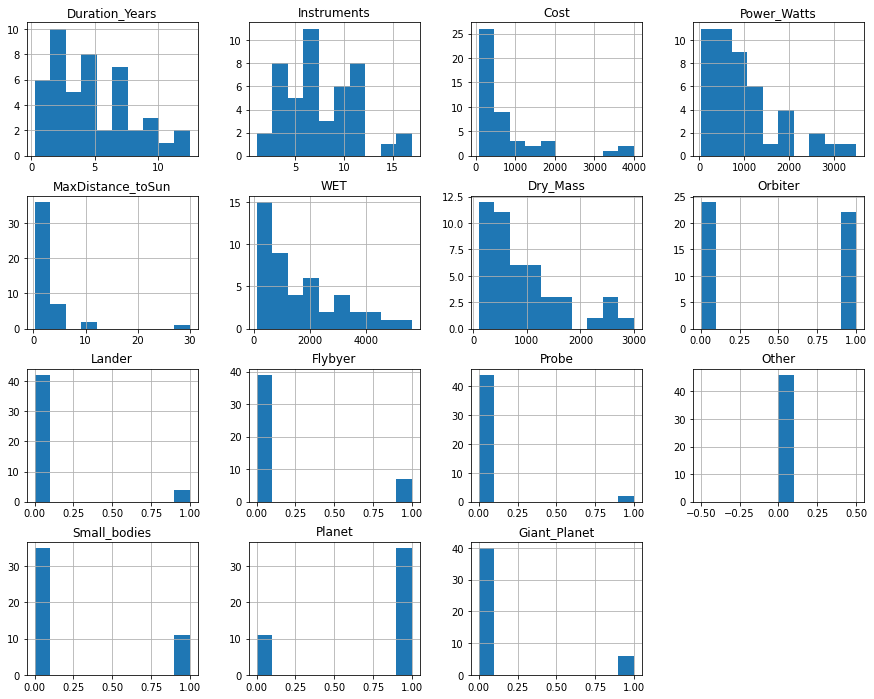

In [36]:
ip_missions.hist(figsize=(15,12))
#I see here that the data is skewed, and scales are different so we will need to sca;e this!

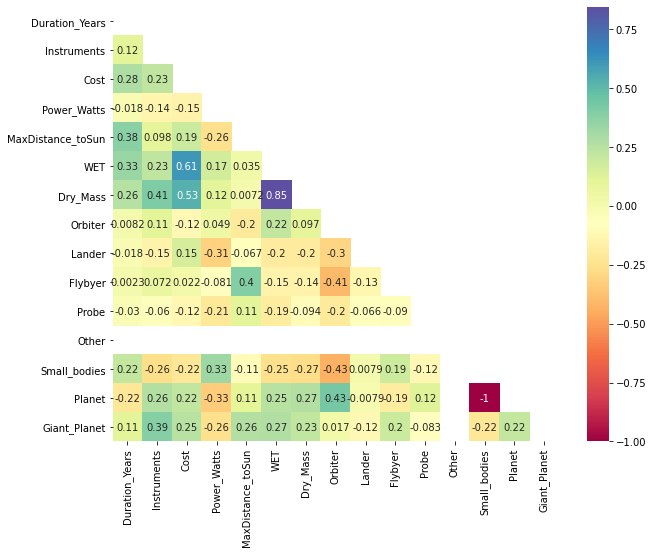

In [37]:
ipm_corr = ip_missions.corr()
mask = np.triu(np.ones_like(ipm_corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(ipm_corr,mask=mask, cmap ='Spectral', annot=True)
plt.show()

#I see the following (stronger) correlations that could be influencing the cost:
# WET : Launch Mass (includes fuel)
# DRY MASS : without the fuel
# DURATION in YEARS 
# INSTRUMENTS : Even if the correlation is not so strong, it will be included, for the sake of this ex.

<AxesSubplot:xlabel='Power_Watts', ylabel='Cost'>

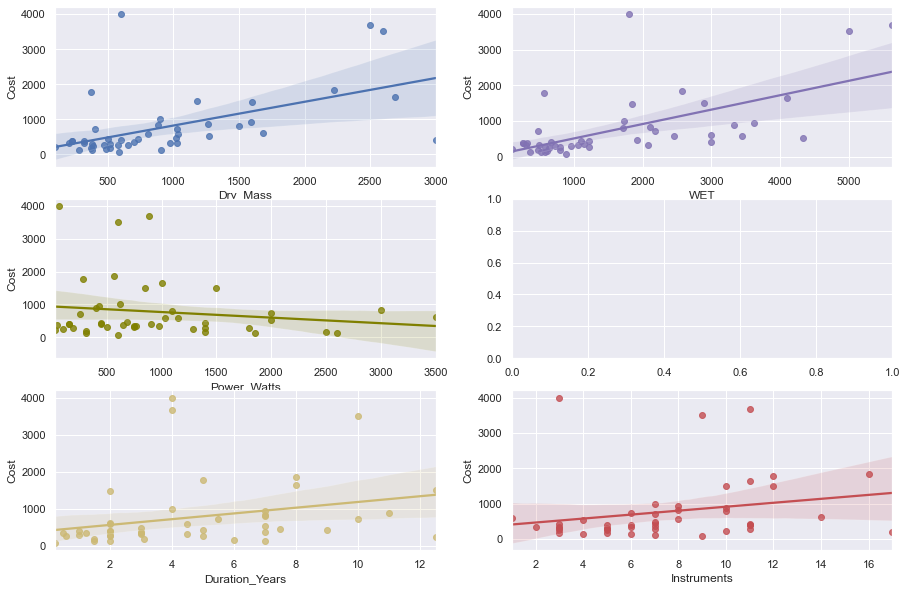

In [38]:
sns.set_theme(color_codes=True)

f, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.regplot(x=ip_missions['Dry_Mass'], y=ip_missions['Cost'], color="b",ax=axes[0,0])
sns.regplot(x=ip_missions['WET'], y=ip_missions['Cost'], color="m",ax=axes[0,1])
sns.regplot(x=ip_missions['Duration_Years'], y=ip_missions['Cost'], color="y",ax=axes[2,0])
sns.regplot(x=ip_missions['Instruments'], y=ip_missions['Cost'], color="r",ax=axes[2,1])
sns.regplot(x=ip_missions['Power_Watts'], y=ip_missions['Cost'], color="olive",ax=axes[1,0])

#for this model, I chose to do a logistic regression 
#The targuet will be the Cost at completion (CAC) This cost has already been converted to 
#economic conditions based on 2020's given data
#this takes in consideration, the infaltion variance

- SCALING THE FEATURES

In [39]:
ip_missions.columns

Index(['Duration_Years', 'Instruments', 'Cost', 'Power_Watts',
       'MaxDistance_toSun', 'WET', 'Dry_Mass', 'Orbiter', 'Lander', 'Flybyer',
       'Probe', 'Other', 'Small_bodies', 'Planet', 'Giant_Planet'],
      dtype='object')

In [40]:
#SPECIFIC SCALING: 'WET', 'Dry_Mass','Power_Watts',
#My data has different scales so I will normalize it using the coefficient of variation(using the mean as measure of scale)
#Doubt wether I should min=Max scale it

ip_missions['scaled_WetMass']=ip_missions.WET/ip_missions.WET.mean()
ip_missions['scaled_DryMass']=ip_missions.Dry_Mass/ip_missions.Dry_Mass.mean()
ip_missions['scaled_Power']=ip_missions.Power_Watts/ip_missions.Power_Watts.mean()
ip_missions['scaled_DurationY']=ip_missions.Duration_Years/ip_missions.Duration_Years.mean()
ip_missions['scaled_Instruments']=ip_missions.Instruments/ip_missions.Instruments.mean()
ip_missions['scaled_Cost']=ip_missions.Cost/ip_missions.Cost.mean()


<AxesSubplot:xlabel='scaled_Power', ylabel='scaled_Cost'>

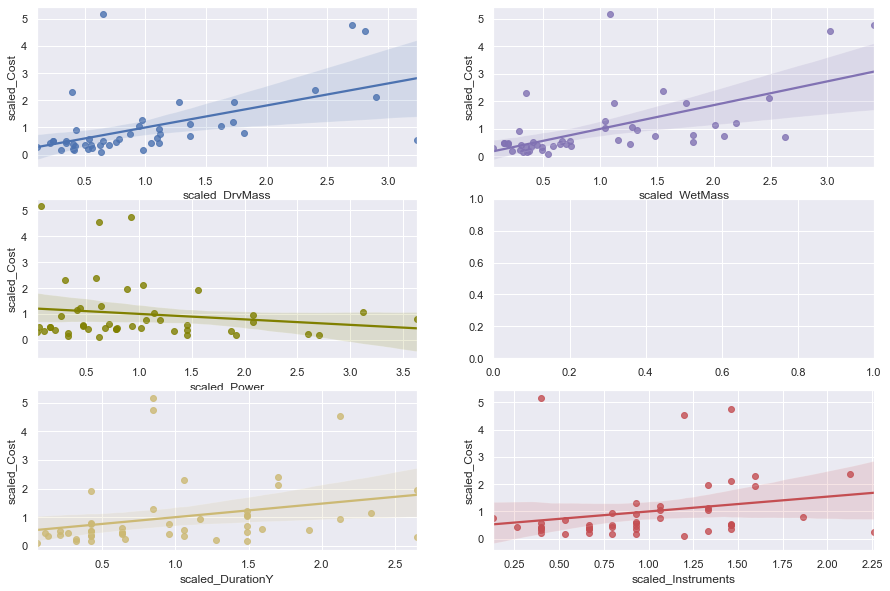

In [41]:
f, axes = plt.subplots(3, 2, figsize=(15, 10))

sns.regplot(x=ip_missions['scaled_WetMass'], y=ip_missions['scaled_Cost'], color="m",ax=axes[0,1])
sns.regplot(x=ip_missions['scaled_DryMass'], y=ip_missions['scaled_Cost'], color="b",ax=axes[0,0])
sns.regplot(x=ip_missions['scaled_DurationY'], y=ip_missions['scaled_Cost'], color="y",ax=axes[2,0])
sns.regplot(x=ip_missions['scaled_Instruments'], y=ip_missions['scaled_Cost'], color="r",ax=axes[2,1])
sns.regplot(x=ip_missions['scaled_Power'], y=ip_missions['scaled_Cost'], color="olive",ax=axes[1,0])

array([[<AxesSubplot:title={'center':'Duration_Years'}>,
        <AxesSubplot:title={'center':'Instruments'}>,
        <AxesSubplot:title={'center':'Cost'}>,
        <AxesSubplot:title={'center':'MaxDistance_toSun'}>],
       [<AxesSubplot:title={'center':'Orbiter'}>,
        <AxesSubplot:title={'center':'Lander'}>,
        <AxesSubplot:title={'center':'Flybyer'}>,
        <AxesSubplot:title={'center':'Probe'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Small_bodies'}>,
        <AxesSubplot:title={'center':'Planet'}>,
        <AxesSubplot:title={'center':'Giant_Planet'}>],
       [<AxesSubplot:title={'center':'scaled_WetMass'}>,
        <AxesSubplot:title={'center':'scaled_DryMass'}>,
        <AxesSubplot:title={'center':'scaled_Power'}>,
        <AxesSubplot:title={'center':'scaled_DurationY'}>],
       [<AxesSubplot:title={'center':'scaled_Instruments'}>,
        <AxesSubplot:title={'center':'scaled_Cost'}>, <AxesSubplot:>,
        <AxesSu

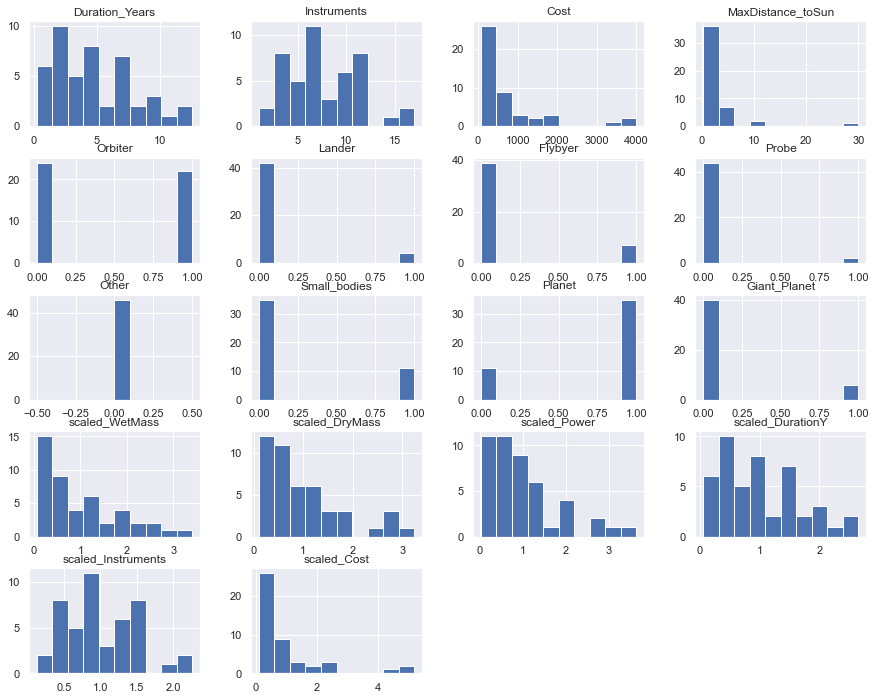

In [42]:
ip_missions.drop(['WET','Dry_Mass','Power_Watts'],axis=1).hist(figsize=(15,12))
#Looks more scaled

In [43]:
#THIS IS A WAY TO SCALE BUT IT WOULD BE BETTER TO APPLY SPECIFIC SCALING
# from sklearn.preprocessing import RobustScaler
# y = ip_missions['Cost']
# X = ip_missions.drop('Cost', axis=1)
# Robust_Scaler = RobustScaler()
# scaled_X = Robust_Scaler.fit_transform(X)

- SPLITTING THE DATA (TRAIN/TEST)

In [44]:
from sklearn.model_selection import train_test_split

non_scaled = ['Cost','WET','Dry_Mass','Power_Watts','Duration_Years','Instruments']

#I will convert the target variable Cost to logarithmic scale
y = ip_missions['scaled_Cost']
X = ip_missions.drop(non_scaled, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

- IMPORTING AND CHOSING THE MODEL TO APPLY
(Linear Reg, SVM, RandomForest)

- RRANDOM FOREST REGRESSOR

In [45]:
from sklearn.ensemble import RandomForestRegressor

score_train=[]
score_test=[]
for i in range(2,30,2):
    RanForestR_model = RandomForestRegressor(max_depth=i).fit(X_train, y_train)
    score_train.append(RanForestR_model.score(X_train,y_train))
    score_test.append(RanForestR_model.score(X_test,y_test))
    print(f'for max_depth: {i}\nthe train scores are:\n {score_train}\nThe test scores are:\n {score_test}')

for max_depth: 2
the train scores are:
 [0.9177130511757798]
The test scores are:
 [0.8626614091063294]
for max_depth: 4
the train scores are:
 [0.9177130511757798, 0.9458776206659462]
The test scores are:
 [0.8626614091063294, 0.9132056960973818]
for max_depth: 6
the train scores are:
 [0.9177130511757798, 0.9458776206659462, 0.9259952093585854]
The test scores are:
 [0.8626614091063294, 0.9132056960973818, 0.8763020462096189]
for max_depth: 8
the train scores are:
 [0.9177130511757798, 0.9458776206659462, 0.9259952093585854, 0.9314792909780655]
The test scores are:
 [0.8626614091063294, 0.9132056960973818, 0.8763020462096189, 0.9027460752580092]
for max_depth: 10
the train scores are:
 [0.9177130511757798, 0.9458776206659462, 0.9259952093585854, 0.9314792909780655, 0.948914661537287]
The test scores are:
 [0.8626614091063294, 0.9132056960973818, 0.8763020462096189, 0.9027460752580092, 0.8733023618168144]
for max_depth: 12
the train scores are:
 [0.9177130511757798, 0.9458776206659462

In [46]:
from sklearn.metrics import mean_squared_error
y_pred=RanForestR_model.predict(X_test)
print(f' prediction{y_pred}')
print(f' y_test{y_test}')

 prediction[0.20565379 3.42837556 1.04530677 0.22721463 2.03900462 0.42507322
 0.23248292 0.54280177 0.34532018 3.53034587]
 y_test11    0.165659
7     4.546225
28    1.069431
34    0.159717
8     2.391761
19    0.400002
16    0.095238
30    0.514381
9     0.373673
3     4.760016
Name: scaled_Cost, dtype: float64


In [47]:
# ip_missions

In [48]:
print(mean_squared_error(y_test, y_pred)) #0,017

0.29139261273663586


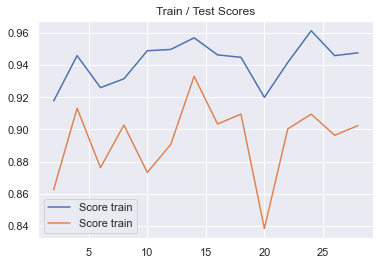

In [58]:
x = range(2,30,2)
plt.plot(x,score_train, label='Score train')
plt.plot(x,score_test, label='Score train')


plt.title("Train / Test Scores")
plt.legend()


In [50]:
model2 = RandomForestRegressor(max_depth=12).fit(X_train, y_train)
print(f'train score for 12 : {model2.score(X_train,y_train)}, \ntest score {model2.score(X_test,y_test)}') 

train score for 12 : 0.9603560682659603, 
test score 0.9202794646917435


In [51]:
#I believe the model is overfitting... it might be linked to the insufficient data points available

- LINEAR REGRESSION

In [52]:
from sklearn.linear_model import LinearRegression

ipm_Lmodel = LinearRegression().fit(X_train,y_train)

In [53]:
y_pred_L= ipm_Lmodel.predict(X_test)
print(f'linear reg pred :\n{y_pred_L}\n RandomForest pred:\n{y_pred}\ny_test:\n{y_test}')
#y_pre_L is a bit TOO close to y_test.... weird...

linear reg pred :
[0.16565862 4.54622521 1.06943127 0.15971662 2.39176088 0.40000172
 0.09523828 0.51438077 0.37367282 4.76001551]
 RandomForest pred:
[0.20565379 3.42837556 1.04530677 0.22721463 2.03900462 0.42507322
 0.23248292 0.54280177 0.34532018 3.53034587]
y_test:
11    0.165659
7     4.546225
28    1.069431
34    0.159717
8     2.391761
19    0.400002
16    0.095238
30    0.514381
9     0.373673
3     4.760016
Name: scaled_Cost, dtype: float64


In [54]:
from sklearn.metrics import r2_score

r_2_score = r2_score(y_pred_L,y_test)
r_2_score

1.0

In [55]:
import statsmodels.api as sm
stats_model = sm.OLS(y_train, X_train)
model_results = stats_model.fit()
print(model_results.summary())
#The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. 
#If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. 
#In other words, this particular variable is not contributing to the linear model and it can be removed 

                            OLS Regression Results                            
Dep. Variable:            scaled_Cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.870e+27
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          2.81e-302
Time:                        12:41:07   Log-Likelihood:                 1103.1
No. Observations:                  36   AIC:                            -2178.
Df Residuals:                      22   BIC:                            -2156.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
MaxDistance_toSun   1.169e-15   7.75

- TRYING WITH RIDGE

In [56]:
from tqdm import tqdm
#Instantly make your loops show a smart progress meter 
#- just wrap any iterable with tqdm(iterable), and you’re done!

# Ridge regression
# Ridge is a linear least squares model with l2 regularization. In other words, it is linear regression with l2 regularizer.
# Over-fitting or under-fitting of the Ridge model depends on the parameter alpha, which can be tuned to the right value by doing hyper-parameter tuning as shown below.

# Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are 
#unbiased, but their variances are large so they may be far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the 
#standard errors. It is hoped that the net effect will be to give estimates that are more reliable. Another biased regression technique, principal components regression, 
#is also available in NCSS. Ridge regression is the more popular of the two methods.
from sklearn.linear_model import Ridge


alpha = [1, 2, 3, 3.5, 4, 4.5, 5, 6, 7] 
test_rmsle_array=[] 
for i in alpha:
    Ridge_model = Ridge(solver="sag", random_state=42, alpha=i)
    Ridge_model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    test_rmsle_array.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

for i in range(len(test_rmsle_array)):
    print ('RMSLE for alpha = ',alpha[i],'is',test_rmsle_array[i])
    
best_alpha = np.argmin(test_rmsle_array)

fig, ax = plt.subplots()
ax.plot(alpha, test_rmsle_array)
ax.scatter(alpha, test_rmsle_array)
for i, txt in enumerate(np.round(test_rmsle_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],test_rmsle_array[i]))

plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show()

NameError: name 'model' is not defined

In [ ]:
print("Best alpha: ",  alpha[best_alpha])
Ridge_model = Ridge(solver="sag", random_state=42, alpha=alpha[best_alpha])
Ridge_model.fit(X_train, y_train)
ridge_preds_tr = model.predict(X_train)
ridge_preds_te = model.predict(X_test)

print('Train RMSLE:', sqrt(mse(y_train, ridge_preds_tr)))

ridge_rmsle = sqrt(mse(y_cv, ridge_preds_cv))
print("Cross validation RMSLE: ", ridge_rmsle)